In [1]:
import pandas as pd
import numpy as np
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')
figsize=(8,6)


def load_df(path, columns=None, nthreads=4, strings_to_categorical=True):
    try:
        table = pq.read_table(path, columns=columns, nthreads=nthreads)
        return table.to_pandas(strings_to_categorical=strings_to_categorical)
    except Exception as e:
        print(e)


cols = ['id', 'model', 'brand', 'manufacturer', 'product',
        'os_version', 'kernel_version', 'is_root']
        
df = load_df('../src/devices.parquet', cols)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3265 entries, 0 to 3264
Data columns (total 8 columns):
id                3265 non-null uint16
model             3265 non-null category
brand             3265 non-null category
manufacturer      3265 non-null category
product           3265 non-null category
os_version        3265 non-null category
kernel_version    3265 non-null category
is_root           3265 non-null uint8
dtypes: category(6), uint16(1), uint8(1)
memory usage: 193.3 KB


In [2]:
df.head()

,id,model,brand,manufacturer,product,os_version,kernel_version,is_root
0,1,vs500pp,lge,lge,m1v_pp_vzw,6.0.1,3.10.49-gf18313b-00011-g5e5ed63,0
1,2,ao5510,yu,yu,yureka,5.1.1,3.10.49-cyanogenmod-gbca6118,1
2,3,asus_x014d,asus,asus,ww_phone,5.1.1,3.4.0-gdf95949-dirty,0
3,4,nexus 5,google,lge,hammerhead,6.0.1,3.4.0-gcf10b7e,0
4,5,lg-d331,lge,lge,luv80ss_global_com,4.4.2,3.4.67,0


In [3]:
df.describe(include=['category'])

,model,brand,manufacturer,product,os_version,kernel_version
count,3265,3265,3265,3265,3265,3265
unique,798,124,131,812,22,816
top,ale-l21,samsung,samsung,ale-l21,7.0,3.18.14-11104523
freq,165,1011,1006,165,1007,103


[Text(0,0.5,'# Devices')]

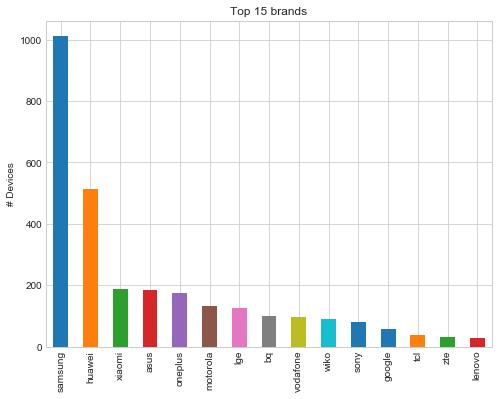

In [4]:
brands = df.brand.value_counts()[0:15]
cx = brands.plot(kind='bar', title='Top 15 brands', figsize=figsize)
cx.set(ylabel='# Devices')

[Text(0,0.5,'# Devices')]

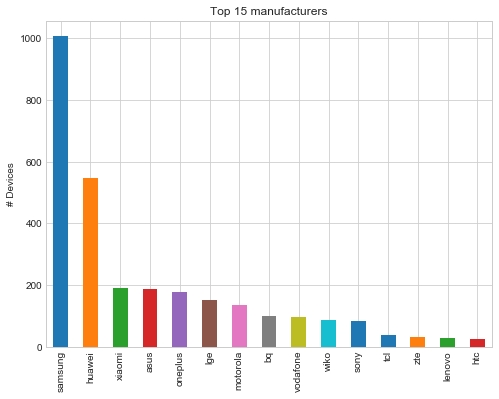

In [5]:
manufacturers = df.manufacturer.value_counts()[0:15]
cx = manufacturers.plot(kind='bar', title='Top 15 manufacturers', figsize=figsize)
cx.set(ylabel='# Devices')

[Text(0,0.5,'# Devices')]

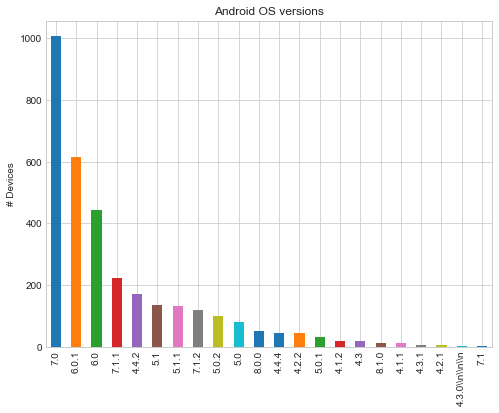

In [6]:
versions = df.os_version.value_counts()
cx = versions.plot(kind='bar', title='Android OS versions', figsize=figsize)
cx.set(ylabel='# Devices')

[Text(0,0.5,'# Devices')]

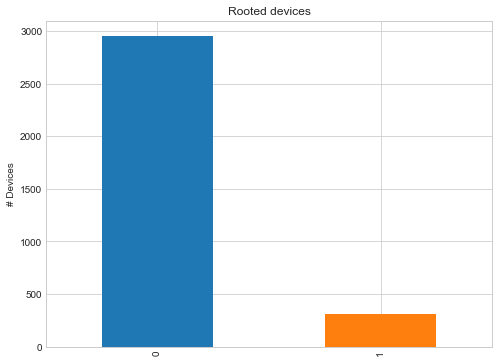

In [7]:
root = df.is_root.value_counts()
cx = root.plot(kind='bar', title='Rooted devices', figsize=figsize)
cx.set(ylabel='# Devices')